#  <u> 1st step : Load


We import the different librairies that we are going to use :

    - pandas : Pandas is a library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical arrays and time series.

In [39]:
# we import the useful librairies 
import pandas as pd
import matplotlib.pyplot as plt

We open the final merged table without outliers of the 'outliers part ' 

In [40]:
# we open and read the merge table of all indicators
silver_dataset = pd.read_csv ('./data/SilverDataset.csv')
silver_dataset = silver_dataset.drop(silver_dataset.columns[0], axis = 1)
silver_dataset

,Code,Year,Deaths,Fertility,GDP,GenderInequality,LifeExpectancy,tertiary_education
0,ABW,1950,NaN,NaN,NaN,NaN,0.606711,NaN
1,ABW,1951,NaN,NaN,NaN,NaN,0.613423,NaN
2,ABW,1952,NaN,NaN,NaN,NaN,0.626846,NaN
3,ABW,1953,NaN,NaN,NaN,NaN,0.637584,NaN
4,ABW,1954,NaN,NaN,NaN,NaN,0.649664,NaN
...,...,...,...,...,...,...,...,...
21097,ZWE,2017,0.002081,0.364724,NaN,0.641533,0.653691,NaN
21098,ZWE,2018,0.001968,0.358897,NaN,0.645241,0.663087,NaN
21099,ZWE,2019,0.001916,0.351543,NaN,0.642769,0.661745,NaN
21100,ZWE,2020,0.001879,0.344855,NaN,0.642769,0.659060,NaN


#  <u> 2nd step : Filter by year 


We notice that we don't have data before 1830 apart from one country, it will lead us to filter the dataset and remove the data before the years 1825 

In [41]:
silver_dataset = silver_dataset[silver_dataset['Year'] > 1830]
silver_dataset

,Code,Year,Deaths,Fertility,GDP,GenderInequality,LifeExpectancy,tertiary_education
0,ABW,1950,NaN,NaN,NaN,NaN,0.606711,NaN
1,ABW,1951,NaN,NaN,NaN,NaN,0.613423,NaN
2,ABW,1952,NaN,NaN,NaN,NaN,0.626846,NaN
3,ABW,1953,NaN,NaN,NaN,NaN,0.637584,NaN
4,ABW,1954,NaN,NaN,NaN,NaN,0.649664,NaN
...,...,...,...,...,...,...,...,...
21097,ZWE,2017,0.002081,0.364724,NaN,0.641533,0.653691,NaN
21098,ZWE,2018,0.001968,0.358897,NaN,0.645241,0.663087,NaN
21099,ZWE,2019,0.001916,0.351543,NaN,0.642769,0.661745,NaN
21100,ZWE,2020,0.001879,0.344855,NaN,0.642769,0.659060,NaN


#  <u> 3rd step : Count the number of NaN values 


We can count how many NaN values we have, it corresponds to the number of outliers we have removed in the step forward

In [42]:
silver_dataset.isna().sum().sum()

61621

Then the can count the number of unique countries taht we have, and put them in a list

In [43]:
nb_countries_serie = silver_dataset.Code.value_counts()
nb_countries_serie 

Code
NOR         191
GBR         191
CHL         191
NLD         191
DNK         191
           ... 
OWID_SRM     56
OWID_CZS     44
OWID_AUH     40
OWID_GFR     40
OWID_CIS      9
Name: count, Length: 243, dtype: int64

Then we convert all the name of different countries to a list 

In [44]:
list_diff_countries = nb_countries_serie.index.tolist()

#  <u> 4th step : Reducing the number of NaN values 



##  <u>  First to reduce the missing data we do a linear interpolation

Linear interpolation is a method useful for curve fitting using linear polynomials.  
It helps in building new data points within the range of a discrete set of already known data points.   
Therefore, the Linear interpolation is the simplest method for estimating a channel from the vector of the given channel's estimates.

In [18]:
df = silver_dataset

# we take the first country of the list 
dat=df.loc[df.loc[:, 'Code'] == list_diff_countries[0]]

# we call the interpolate function
datc=dat.interpolate(method="linear")
data=datc

#Then we do that for the rest of teh countries 
for i in range(1,len(list_diff_countries)):
    dat=df.loc[df.loc[:, 'Code'] == list_diff_countries[i]]
    datc=dat.interpolate(method="linear")
    
    # and we concatenate the new data with the previous data interpolated
    data=pd.concat((data, datc), axis = 0)
    
#Finally we calculate the number of NaN values     
data.isna().sum().sum()

51201

We can now plot the values of fertility for afghanistan before using the method, and then plot on the same chart the values of the fertility for afghanistan after using the method to see which point have been add.

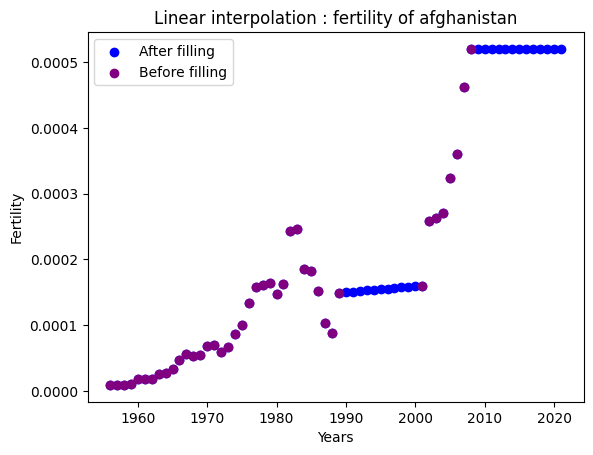

In [26]:
# We first reduce the dataset before removing outliers to keep only one country et one indicator
df = data[data.Code == 'AFG']

#we plot the values of fertility for each year for Afghanistan with outliers
plt.scatter(df['Year'], df['GDP '], color='blue', label='After filling')

# We first reduce the dataset before removing outliers to keep only one country et one indicator
df = silver_dataset[silver_dataset.Code == 'AFG']

#we plot the values of fertility for each year for Afghanistan with outliers
plt.scatter(df['Year'], df['GDP '], color='purple',label='Before filling')

# we define the title and the labels of the axis 
plt.title('Linear interpolation : fertility of afghanistan')
plt.xlabel('Years')
plt.ylabel('Fertility')

plt.legend()
plt.show()

We can observe that it reduces a lot the number of missing datas

##  <u>  Then we do the backward filling

We can use backward filling for gaps that have no beginning or begin before our date range.

It means Filling the previous cell with future values

In [28]:
df = silver_dataset

dat=df.loc[df.loc[:, 'Code'] == list_diff_countries[0]]

#We call the backward filling method
datc=dat.fillna(method='bfill')
data=datc

for i in range(1,len(list_diff_countries)):
    dat=df.loc[df.loc[:, 'Code'] == list_diff_countries[i]]
    datc=dat.fillna(method='bfill')
    
    data=pd.concat((data, datc), axis = 0)
    
    
data.isna().sum().sum()

23870

We can now plot the values of fertility for afghanistan before using the method, and then plot on the same chart the values of the fertility for afghanistan after using the method to see which point have been add.

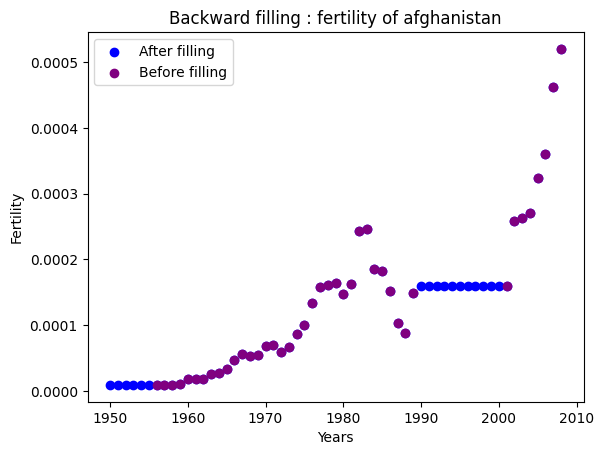

In [30]:
# We first reduce the dataset before removing outliers to keep only one country et one indicator
df = data[data.Code == 'AFG']

#we plot the values of fertility for each year for Afghanistan with outliers
plt.scatter(df['Year'], df['GDP '], color='blue', label='After filling')

# We first reduce the dataset before removing outliers to keep only one country et one indicator
df = silver_dataset[silver_dataset.Code == 'AFG']

#we plot the values of fertility for each year for Afghanistan with outliers
plt.scatter(df['Year'], df['GDP '], color='purple',label='Before filling')

# we define the title and the labels of the axis 
plt.title('Backward filling : fertility of afghanistan')
plt.xlabel('Years')
plt.ylabel('Fertility')

plt.legend()
plt.show()

It is not better , we try an other method ,
##  <u>  Then the forward filling

We can use forward filling for gaps that have a definitive start date.

It consists of padding non-existent values "forward", causing existing values to pad non-existent values that follow them.  
Forward-filling imputed missing values using the last observed value. 


In [31]:
df = silver_dataset
dat=df.loc[df.loc[:, 'Code'] == list_diff_countries[0]]

#We call the forward filling method
datc=dat.fillna(method='ffill')
data=datc

for i in range(1,len(list_diff_countries)):
    dat=df.loc[df.loc[:, 'Code'] == list_diff_countries[i]]
    datc=dat.fillna(method='ffill')
    data=pd.concat((data, datc), axis = 0)
data.isna().sum().sum()

51201

We can now plot the values of fertility for afghanistan before using the method, and then plot on the same chart the values of the fertility for afghanistan after using the method to see which point have been add.

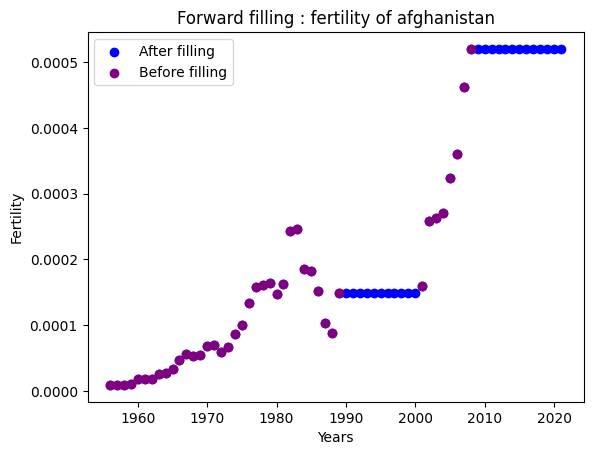

In [32]:
# We first reduce the dataset before removing outliers to keep only one country et one indicator
df = data[data.Code == 'AFG']

#we plot the values of fertility for each year for Afghanistan with outliers
plt.scatter(df['Year'], df['GDP '], color='blue', label='After filling')

# We first reduce the dataset before removing outliers to keep only one country et one indicator
df = silver_dataset[silver_dataset.Code == 'AFG']

#we plot the values of fertility for each year for Afghanistan with outliers
plt.scatter(df['Year'], df['GDP '], color='purple',label='Before filling')

# we define the title and the labels of the axis 
plt.title('Forward filling : fertility of afghanistan')
plt.xlabel('Years')
plt.ylabel('Fertility')

plt.legend()
plt.show()

To obtain a better result we gonna mix the methods

### First we mix the forward filling and the linear interpolation

In [33]:
df = silver_dataset
dat=df.loc[df.loc[:, 'Code'] == list_diff_countries[0]]

#linear interpolation method
datc=dat.interpolate(method="linear")

#then forward filling method
datc=datc.fillna(method='ffill')
data=datc

for i in range(1,len(list_diff_countries)):
    dat=df.loc[df.loc[:, 'Code'] == list_diff_countries[i]]
    
    datc=dat.interpolate(method="linear")
    datc=datc.fillna(method='ffill')
    
    data=pd.concat((data, datc), axis = 0)
data.isna().sum().sum()

51201

It is not perfect 
### Then we mix the backward filling and the linear interpolation

In [34]:
df = silver_dataset
dat=df.loc[df.loc[:, 'Code'] == list_diff_countries[0]]

#linear interpolation method
datc=dat.interpolate(method="linear")

#then forward filling method
datc=datc.fillna(method='bfill')
data=datc

for i in range(1,len(list_diff_countries)):
    dat=df.loc[df.loc[:, 'Code'] == list_diff_countries[i]]
    
    datc=dat.interpolate(method="linear")
    datc=datc.fillna(method='bfill')
    data=pd.concat((data, datc), axis = 0)
data.isna().sum().sum()

18622

It is perfect , but we can also
###  <u>  Mix the three methods

In [35]:
df = silver_dataset
dat=df.loc[df.loc[:, 'Code'] == list_diff_countries[0]]

#linear interpollation method
datc=dat.interpolate(method="linear")

#backward filling method
datf=datc.fillna(method='bfill')

#forward filling method
datr=datf.fillna(method='ffill')
data=datr

for i in range(1,len(list_diff_countries)):
    dat=df.loc[df.loc[:, 'Code'] == list_diff_countries[i]]
    datc=dat.interpolate(method="linear")
    datc=datc.fillna(method='bfill')
    datc=datc.fillna(method='ffill')
    data=pd.concat((data, datc), axis = 0)
data.isna().sum().sum()

18622

We can now plot the values of fertility for afghanistan before using the method, and then plot on the same chart the values of the fertility for afghanistan after using the method to see which point have been add.

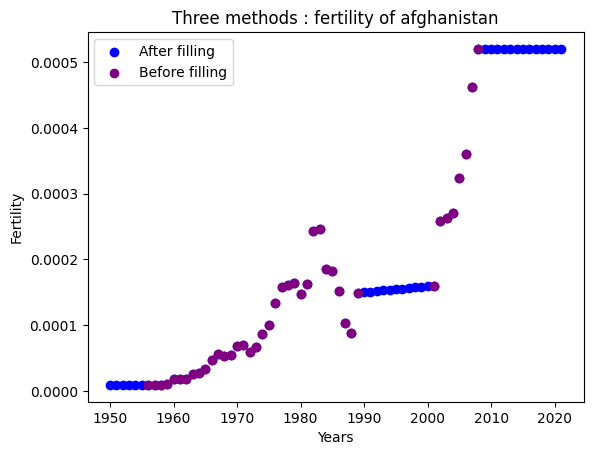

In [38]:
# We first reduce the dataset before removing outliers to keep only one country et one indicator
df = data[data.Code == 'AFG']

#we plot the values of fertility for each year for Afghanistan with outliers
plt.scatter(df['Year'], df['GDP '], color='blue', label='After filling')

# We first reduce the dataset before removing outliers to keep only one country et one indicator
df = silver_dataset[silver_dataset.Code == 'AFG']

#we plot the values of fertility for each year for Afghanistan with outliers
plt.scatter(df['Year'], df['GDP '], color='purple',label='Before filling')

# we define the title and the labels of the axis 
plt.title('Three methods : fertility of afghanistan')
plt.xlabel('Years')
plt.ylabel('Fertility')

plt.legend()
plt.show()

In [36]:
data

,Code,Year,Deaths,Fertility,GDP,GenderInequality,LifeExpectancy,tertiary_education
14098,NOR,1831,0.000114,0.217868,5.892337e-07,0.147095,0.483624,0.096871
14099,NOR,1832,0.000114,0.217868,5.182407e-07,0.147095,0.483624,0.096871
14100,NOR,1833,0.000114,0.217868,5.602877e-07,0.147095,0.483624,0.096871
14101,NOR,1834,0.000114,0.217868,6.143394e-07,0.147095,0.483624,0.096871
14102,NOR,1835,0.000114,0.217868,6.790523e-07,0.147095,0.483624,0.096871
...,...,...,...,...,...,...,...,...
14701,OWID_CIS,2002,NaN,NaN,4.169948e-04,NaN,NaN,NaN
14702,OWID_CIS,2003,NaN,NaN,4.211831e-04,NaN,NaN,NaN
14703,OWID_CIS,2004,NaN,NaN,4.381676e-04,NaN,NaN,NaN
14704,OWID_CIS,2005,NaN,NaN,4.553510e-04,NaN,NaN,NaN


We do  reset the index and rename a column

In [30]:
new_data=data.reset_index()
new_data.columns.names = ['']
new_data.rename(columns = {'index':'Unnamed'}, inplace = True)
new_data

,Unnamed,Code,Year,Deaths,Fertility,GDP,GenderInequality,LifeExpectancy,tertiary_education
0,14098,NOR,1831,0.000114,0.217868,5.892337e-07,0.147095,0.483624,0.096871
1,14099,NOR,1832,0.000114,0.217868,5.182407e-07,0.147095,0.483624,0.096871
2,14100,NOR,1833,0.000114,0.217868,5.602877e-07,0.147095,0.483624,0.096871
3,14101,NOR,1834,0.000114,0.217868,6.143394e-07,0.147095,0.483624,0.096871
4,14102,NOR,1835,0.000114,0.217868,6.790523e-07,0.147095,0.483624,0.096871
...,...,...,...,...,...,...,...,...,...
20900,14701,OWID_CIS,2002,NaN,NaN,4.169948e-04,NaN,NaN,NaN
20901,14702,OWID_CIS,2003,NaN,NaN,4.211831e-04,NaN,NaN,NaN
20902,14703,OWID_CIS,2004,NaN,NaN,4.381676e-04,NaN,NaN,NaN
20903,14704,OWID_CIS,2005,NaN,NaN,4.553510e-04,NaN,NaN,NaN


we create the without clustering golden dataframe 

In [31]:
new_data.to_csv('./data/GoldenDataFrameWithoutCluster.csv')

# <u> Step : Final visualization 

Finally, we plot the final charts before and after filling missing values

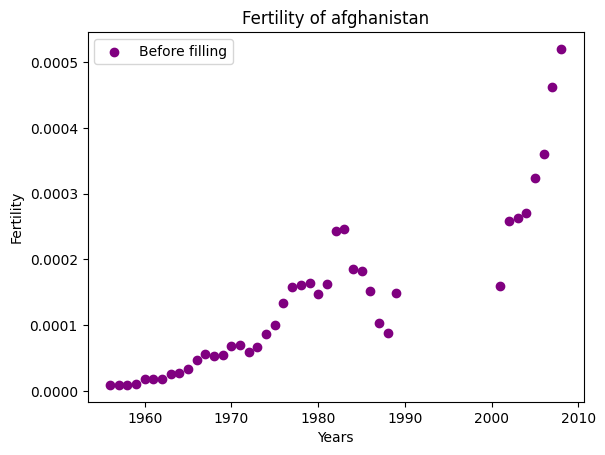

In [45]:
# We first reduce the dataset before removing outliers to keep only one country et one indicator
df = silver_dataset[silver_dataset.Code == 'AFG']

#we plot the values of fertility for each year for Afghanistan with outliers
plt.scatter(df['Year'], df['GDP '], color='purple',label='Before filling')

# we define the title and the labels of the axis 
plt.title('Fertility of afghanistan')
plt.xlabel('Years')
plt.ylabel('Fertility')

plt.legend()
plt.show()

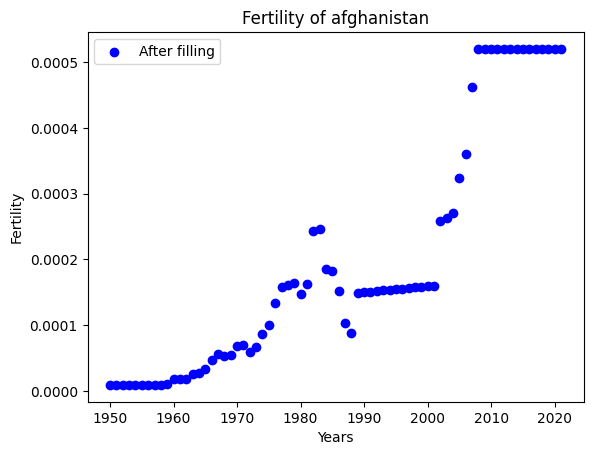

In [46]:
# We first reduce the dataset before removing outliers to keep only one country et one indicator
df = data[data.Code == 'AFG']

#we plot the values of fertility for each year for Afghanistan with outliers
plt.scatter(df['Year'], df['GDP '], color='blue', label='After filling')

# we define the title and the labels of the axis 
plt.title('Fertility of afghanistan')
plt.xlabel('Years')
plt.ylabel('Fertility')

plt.legend()
plt.show()